<a href="https://colab.research.google.com/github/Jollyhrothgar/banjo_liberation/blob/main/notebooks/Banjo_Liberation_Mystic_Rolls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import random
import json
import matplotlib.pyplot as plt

# Random Roll Generator

This method was pair-programmed with Mike and Ricky.

In [34]:
def generate_roll(roll_length, finger_list=['T', '1', '2']):
  """
  Given a set of allowed fingers and a validator, randomly generate rolls
  of length `roll_length`.

  Args:
    roll_length: number of notes in a roll
    finger_list: the possible ways to strike a string
  """
  return "".join([random.choice(finger_list) for i in range(roll_length)])

def generate_all_rolls(roll_length=8, finger_list=["T", "1", "2"], rolls=[]):
  """
  We take a recurisve approach here, and leverage the fact that all rolls in the
  roll list are the same length each time the function is called.
  """
  if len(rolls) == 0:
    return generate_all_rolls(roll_length=roll_length, finger_list=finger_list, rolls=finger_list)
  elif len(rolls[0]) == roll_length:
    return rolls
  else:
    new_rolls = []
    for finger in finger_list:
      for roll in rolls:
        new_rolls.append(roll + finger)
  return generate_all_rolls(roll_length=roll_length, finger_list=finger_list, rolls=new_rolls)
  

def validate_roll(roll, rule_list):
  """Checks roll against each rule in the rule list. All validation checks must
  pass for a roll to be valid."""
  return all(rule(roll) for rule in rule_list)


In [20]:
rules = [
  lambda x: 'TT' not in x,
  lambda x: '11' not in x,
  lambda x: '22' not in x
]

In [19]:
def randomly_generate_rolls(num_trials, roll_generator_kwargs, rule_list):
  roll_counter = {}
  for trial in range(num_trials):
    roll_candidate = generate_roll(**roll_generator_kwargs)
    roll = roll_candidate if validate_roll(roll_candidate, rule_list) else ''
    if roll not in roll_counter:
      roll_counter[roll] = 1
    else:
      roll_counter[roll] += 1
  return roll_counter

In [32]:
randomly_generate_rolls(num_trials=100, roll_generator_kwargs=dict(roll_length=8), rule_list=rule_list)

{'': 91,
 '1T2T212T': 1,
 '212121T1': 1,
 '21T12T1T': 1,
 '21T2T2T2': 1,
 '2T12T121': 1,
 '2T12T21T': 1,
 '2T1T212T': 1,
 '2T21T12T': 1,
 'T212121T': 1}

In [52]:
trials = [
    (
        i,
        len(randomly_generate_rolls(num_trials=i, roll_generator_kwargs=dict(roll_length=8), rule_list=rule_list).keys())
    ) 
    for i in range(5000)
]

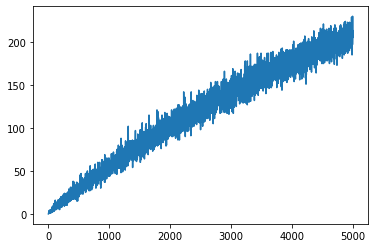

In [53]:
trials, discovered_rolls = zip(*trials)
plt.plot(trials, discovered_rolls)

# Exhaustive Roll Generation

With this method, we use recursion to recurisvely find every possible roll of any length given a finger list.

In [37]:
# Generate all possible rolls, then remove all invalid rolls.
rolls = generate_all_rolls()
eight_rolls = list(filter(lambda x: validate_roll(x, rule_list=rules), rolls))

rolls = generate_all_rolls(roll_length=4)
four_rolls = list(filter(lambda x: validate_roll(x, rule_list=rules), rolls))

Its **much** faster to recursively generate 8-note rolls.

In [39]:
print(len(eight_rolls))
print(eight_rolls)

384
['1T1T1T1T', '2T1T1T1T', 'T21T1T1T', '121T1T1T', '1T2T1T1T', '2T2T1T1T', 'T12T1T1T', '212T1T1T', 'T1T21T1T', '21T21T1T', 'T2T21T1T', '12T21T1T', '1T121T1T', '2T121T1T', 'T2121T1T', '12121T1T', '1T1T2T1T', '2T1T2T1T', 'T21T2T1T', '121T2T1T', '1T2T2T1T', '2T2T2T1T', 'T12T2T1T', '212T2T1T', 'T1T12T1T', '21T12T1T', 'T2T12T1T', '12T12T1T', '1T212T1T', '2T212T1T', 'T1212T1T', '21212T1T', 'T1T1T21T', '21T1T21T', 'T2T1T21T', '12T1T21T', '1T21T21T', '2T21T21T', 'T121T21T', '2121T21T', 'T1T2T21T', '21T2T21T', 'T2T2T21T', '12T2T21T', '1T12T21T', '2T12T21T', 'T212T21T', '1212T21T', '1T1T121T', '2T1T121T', 'T21T121T', '121T121T', '1T2T121T', '2T2T121T', 'T12T121T', '212T121T', 'T1T2121T', '21T2121T', 'T2T2121T', '12T2121T', '1T12121T', '2T12121T', 'T212121T', '1212121T', '1T1T1T2T', '2T1T1T2T', 'T21T1T2T', '121T1T2T', '1T2T1T2T', '2T2T1T2T', 'T12T1T2T', '212T1T2T', 'T1T21T2T', '21T21T2T', 'T2T21T2T', '12T21T2T', '1T121T2T', '2T121T2T', 'T2121T2T', '12121T2T', '1T1T2T2T', '2T1T2T2T', 'T21T2T2T',

In [40]:
print(len(four_rolls))
print(four_rolls)

24
['1T1T', '2T1T', 'T21T', '121T', '1T2T', '2T2T', 'T12T', '212T', 'T1T1', '21T1', 'T2T1', '12T1', '1T21', '2T21', 'T121', '2121', 'T1T2', '21T2', 'T2T2', '12T2', '1T12', '2T12', 'T212', '1212']


Do all four note rolls combine to all eight note rolls?

In [41]:
new_rolls = []
for roll_1 in four_rolls:
  for roll_2 in four_rolls:
    new_rolls.append(roll_1 + roll_2)

In [44]:
eight_from_four = list(filter(lambda x: validate_roll(x, rule_list=rules), new_rolls))

In [45]:
print(len(eight_from_four))
print(eight_from_four)

384
['1T1T1T1T', '1T1T2T1T', '1T1T121T', '1T1T1T2T', '1T1T2T2T', '1T1T212T', '1T1T21T1', '1T1T12T1', '1T1T1T21', '1T1T2T21', '1T1T2121', '1T1T21T2', '1T1T12T2', '1T1T1T12', '1T1T2T12', '1T1T1212', '2T1T1T1T', '2T1T2T1T', '2T1T121T', '2T1T1T2T', '2T1T2T2T', '2T1T212T', '2T1T21T1', '2T1T12T1', '2T1T1T21', '2T1T2T21', '2T1T2121', '2T1T21T2', '2T1T12T2', '2T1T1T12', '2T1T2T12', '2T1T1212', 'T21T1T1T', 'T21T2T1T', 'T21T121T', 'T21T1T2T', 'T21T2T2T', 'T21T212T', 'T21T21T1', 'T21T12T1', 'T21T1T21', 'T21T2T21', 'T21T2121', 'T21T21T2', 'T21T12T2', 'T21T1T12', 'T21T2T12', 'T21T1212', '121T1T1T', '121T2T1T', '121T121T', '121T1T2T', '121T2T2T', '121T212T', '121T21T1', '121T12T1', '121T1T21', '121T2T21', '121T2121', '121T21T2', '121T12T2', '121T1T12', '121T2T12', '121T1212', '1T2T1T1T', '1T2T2T1T', '1T2T121T', '1T2T1T2T', '1T2T2T2T', '1T2T212T', '1T2T21T1', '1T2T12T1', '1T2T1T21', '1T2T2T21', '1T2T2121', '1T2T21T2', '1T2T12T2', '1T2T1T12', '1T2T2T12', '1T2T1212', '2T2T1T1T', '2T2T2T1T', '2T2T121T',

YES! So, all eight-note rolls are composed of two four note rolls. So, we only have to learn TWENTY FOUR rolls.